<a href="https://colab.research.google.com/github/ymirandan/projetosPython/blob/main/DS%3A%20Clusterizacao%20Cartao%20de%20Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto:
dados sobre como usuarios utilziam seu cartao de credito. Objetivo é traçar o comportamento dos usuários

#1 - Importando e Tratando Base de Dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/CC GENERAL.csv')
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Lidando com dados faltantes:

In [3]:
missing = dados.isna().sum()
missing

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

iremos substituir os valores faltantes pela mediana da variavel

In [4]:
dados.fillna(dados.median(),inplace=True)

missing = dados.isna().sum()
missing #checando se ainda restam dados vazios

<ipython-input-4-eb8be0de9609>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.fillna(dados.median(),inplace=True)


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#2 - Utilizando KMeans

Iremos normalizar os dados, coloca-los na mesma escala. Dessa maneira, conseguimos aplicar algoritmos

In [6]:
from sklearn.preprocessing import Normalizer

valores = Normalizer().fit_transform(dados.values)
valores

ValueError: could not convert string to float: 'C10001'

Como não é possivel normalizar a base de dados inteira pois o id é uma string, iremos retirar essa variavel da base de dados e rodar o codigo novamente

In [9]:
dados1 = dados.drop(columns="CUST_ID")

valores = Normalizer().fit_transform(dados1.values)

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init =10, max_iter = 300)
y_pred = kmeans.fit_predict(valores)

#3 - Calculando Medidas de Validação

Será calculado o coeficiente de silhouette para percepção da adequação do modelo utilizado. Essse indicador varia entre -1 e 1. Buscamos um coeficiente proximo a 1; isso significa que os clusteres são mais compactos e bem separados.

In [11]:
from sklearn import metrics
labels = kmeans.labels_
s = metrics.silhouette_score(valores,labels,metric="euclidean")
s

0.364522458672336

Alem desse escore, iremos avaliar o indice de Davies-Bouldin. Quanto menor for o seu valor, mais similares sao os clusteres.

In [12]:
dbs = metrics.davies_bouldin_score(valores,labels)
dbs

1.0760036310644183

Agora, iremos avaliar o indice de Calinski-Harabasz, que considera a variancia entre os clusteres

In [13]:
c = metrics.calinski_harabasz_score(valores,labels)
c

3431.5375429422393

Avaliando medidas citadas conjuntamente com a execução do algoritmo, por meio de uma função:

In [17]:
def clustering_algorithm(n_clusters,dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10,max_iter=300)
  labels=kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset,labels,metric="euclidean")
  dbs = metrics.davies_bouldin_score(dataset,labels)
  c = metrics.calinski_harabasz_score(dataset,labels)
  return s,dbs,c


In [18]:
s1, dbs1, c1 = clustering_algorithm(3,valores)
print(s1,dbs1,c1)

0.32720646261456415 1.3094715687682161 3526.247218614716


In [21]:
s2, dbs2, c2 = clustering_algorithm(5,valores)
print(s2,dbs2,c2)

0.3645214928619483 1.0758523320307778 3431.5410687140725


avaliando os indicadores quando os numeros sao aleatorios, a fim de comparar eficacia do modelo:

In [22]:
import numpy as np
random_data = np.random.rand(8950,16)
s,dbs,c=clustering_algorithm(5,random_data)
print(s,dbs,c)

0.03995648096174976 3.468678524008925 303.3550492100745


#4 - Visualizando Dados

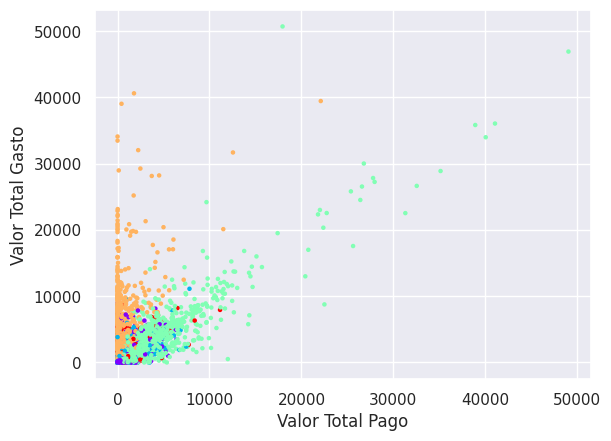

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c=labels,s=5,cmap='rainbow')
plt.xlabel("Valor Total Pago")
plt.ylabel("Valor Total Gasto")
sns.set()


Avaliando medidas descritivas dos clusteres:

In [28]:
dados["cluster"] = labels

dados.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3280.0   443.746756   846.398201   0.000000    23.365333   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2        1536.0  1142.514535  1664.888183   0.000000   212.178230   
3        1074.0  1794.443291  1981.773996   0.000000   507.348768   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.941478   410.126095   9630.367575            3280.0  0.774389   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2         554.332740  1370.859355  19043.138560            1536.0  0.928220   
3        1087.920500  2312.923253  14581.459140            1074.0  0.862388   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... PRC_FULL_PAYMENT       TENURE                                  \
         ...              75%  max   count       mean       std  min   25%   
cluster  ...                                                                 
0        ...         0.444444  1.0  3280.0  11.538110  1.329428  6.0  12.0   
1        ...         0.000000  0.6  2649.0  11.403171  1.481687  6.0  12.0   
2        ...         0.545455  1.0  1536.0  11.594401  1.223098  6.0  12.0   
3        ...         0.142857  1.0  1074.0  11.520484  1.282926  6.0  12.0   
4        ...         0.000000  1.0   411.0  11.790754  0.829347  7.0  12.0   

                           
          50%   75%   max  
cluster                    
0        12.0  12.0  12.0  
1        12.0  12.0  12.0  
2        12.0  12.0  12.0  
3        12.0  12.0  12.0  
4        12.0  12.0  12.0  

[5 rows x 136 columns]

A fim de filtrar as principais dimensoes, sera calculado o valor de variancia a partir dos centroides dos clusteres de cada dimensao

In [34]:
centroids= kmeans.cluster_centers_
max = len(centroids[0])
for i in range(max):
  print(dados.columns.values[i],"{:.4f}".format(centroids[:,i].var()))

CUST_ID 0.0224
BALANCE 0.0000
BALANCE_FREQUENCY 0.0197
PURCHASES 0.0076
ONEOFF_PURCHASES 0.0036
INSTALLMENTS_PURCHASES 0.0225
CASH_ADVANCE 0.0000
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0360
CREDIT_LIMIT 0.0279
PAYMENTS 0.0543
MINIMUM_PAYMENTS 0.0000
PRC_FULL_PAYMENT 0.0000


Podemos avaliar variaveis cujas variancias sao maiores que 0.00. Ou seja,
Balance Frequency, Installments Purchases, Purchase TRX, Credit Limit e Payment.

No caso, podem ser feitas analises univariadas focando em cada dimensao ou multivariadamente, avaliar como elas se relacionam.

In [40]:
#description = dados.groupby("cluster")["BALANCE_FREQUENCY",  'INSTALLMENTS_PURCHASES','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS']
#n_clients = description.size()
#description = description.mean()
#description['n_clients']=n_clients
#description #media dos clusteres em cada variavel, bem como, a quantidade de clientes presentes em cada cluster